# Mission 2.1: Dataset Validation and Interactive Exploration
# Hebrew Idiom Detection Project

**Purpose:** Interactive exploration and validation of the Hebrew idiom dataset

**Date:** November 8, 2025

---

## Setup and Imports

In [22]:
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# Import our data preparation module
from src.data_preperation import DatasetLoader

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', None)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Imports successful!")
print(f"📁 Project root: {project_root}")

✅ Imports successful!
📁 Project root: /Users/igornazarenko/PycharmProjects/Final_Project_NLP


## 1. Load Dataset

In [23]:
# Initialize loader
loader = DatasetLoader()

# Load dataset
df = loader.load_dataset()

print(f"\n✅ Dataset loaded: {len(df)} rows, {len(df.columns)} columns")

Loading dataset from: /Users/igornazarenko/PycharmProjects/Final_Project_NLP/data/expressions_data_tagged.csv
✅ Dataset loaded successfully!
Total rows: 4800

✅ Dataset loaded: 4800 rows, 16 columns


## 2. Basic Dataset Information

In [24]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (4800, 16)

Column Names:
['id', 'split', 'language', 'source', 'text', 'expression', 'matched_expression', 'span_start', 'span_end', 'token_span_start', 'token_span_end', 'num_tokens', 'label', 'label_2', 'iob2_tags', 'char_mask']

Data Types:
id                      int64
split                  object
language               object
source                 object
text                   object
expression             object
matched_expression     object
span_start            float64
span_end              float64
token_span_start        int64
token_span_end          int64
num_tokens              int64
label                  object
label_2                 int64
iob2_tags              object
char_mask              object
dtype: object


In [25]:
# Display first 10 rows
print("First 10 rows:")
df.head(10)

First 10 rows:


,id,split,language,source,text,expression,matched_expression,span_start,span_end,token_span_start,token_span_end,num_tokens,label,label_2,iob2_tags,char_mask
0,0,unspecified,he,inhouse,"אם שר האוצר לא ימצא פתרון למשבר החמור שנוצר בעקבות המלחמה הארוכה ביותר עד כה, הוא עדיין ימשיך לש...",שבר את הראש,לשבור את הראש,94.0,107.0,18,21,28,פיגורטיבי,1,O O O O O O O O O O O O O O O O O O B-IDIOM I-IDIOM I-IDIOM O O O O O O O,000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011...
1,1,unspecified,he,inhouse,"כמה זמן שברת את הראש על ניסוח המייל עם הרעיון המהפכני הזה שלך לדירקטוריון, והאם בסוף שלחת אותו כ...",שבר את הראש,שברת את הראש,8.0,20.0,2,5,20,פיגורטיבי,1,O O B-IDIOM I-IDIOM I-IDIOM O O O O O O O O O O O O O O O,000000001111111111110000000000000000000000000000000000000000000000000000000000000000000000000000...
2,2,unspecified,he,inhouse,"היא מעולם לא שברה את הראש כל כך הרבה זמן כדי למצוא רעיון יצירתי למתנת יום הולדת מפתיעה כזאת, ובס...",שבר את הראש,שברה את הראש,13.0,25.0,3,6,31,פיגורטיבי,1,O O O B-IDIOM I-IDIOM I-IDIOM O O O O O O O O O O O O O O O O O O O O O O O O O,000000000000011111111111100000000000000000000000000000000000000000000000000000000000000000000000...
3,3,unspecified,he,inhouse,"הצוות כולו שבר את הראש על איך לעמוד בדדליין, תוך כדי שנאלץ להתמודד עם בעיות טכניות בלתי צפויות, ...",שבר את הראש,שבר את הראש,11.0,22.0,2,5,25,פיגורטיבי,1,O O B-IDIOM I-IDIOM I-IDIOM O O O O O O O O O O O O O O O O O O O O,000000000001111111111100000000000000000000000000000000000000000000000000000000000000000000000000...
4,4,unspecified,he,inhouse,שברתי את הראש להבין מה היא בעצם מנסה לומר לי.,שבר את הראש,שברתי את הראש,0.0,13.0,0,3,10,פיגורטיבי,1,B-IDIOM I-IDIOM I-IDIOM O O O O O O O,111111111111100000000000000000000000000000000
5,5,unspecified,he,inhouse,"המהנדס שבר את הראש בניסיון לפתור את התקלה המורכבת במערכת הביוב, בזמן שדיווחים על כשלי מערכת פורס...",שבר את הראש,שבר את הראש,7.0,18.0,1,4,26,פיגורטיבי,1,O B-IDIOM I-IDIOM I-IDIOM O O O O O O O O O O O O O O O O O O O O O O,000000011111111111000000000000000000000000000000000000000000000000000000000000000000000000000000...
6,6,unspecified,he,inhouse,"הם שברו את הראש איך להסביר את זה לילדים בלי להפחיד אותם, ובסוף בחרו בגישה רגועה עם דוגמאות מצויר...",שבר את הראש,שברו את הראש,3.0,15.0,1,4,23,פיגורטיבי,1,O B-IDIOM I-IDIOM I-IDIOM O O O O O O O O O O O O O O O O O O O,000111111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000...
7,7,unspecified,he,inhouse,אני שובר את הראש כל פעם מחדש עם הטפסים האלה.,שבר את הראש,שובר את הראש,4.0,16.0,1,4,10,פיגורטיבי,1,O B-IDIOM I-IDIOM I-IDIOM O O O O O O,00001111111111110000000000000000000000000000
8,8,unspecified,he,inhouse,"הוא שבר את הראש כל הלילה בשביל להגיש בזמן את עבודת הגמר, אך כשהמערכת קרסה לפתע בבוקר ההגשה, הוא ...",שבר את הראש,שבר את הראש,4.0,15.0,1,4,29,פיגורטיבי,1,O B-IDIOM I-IDIOM I-IDIOM O O O O O O O O O O O O O O O O O O O O O O O O O,000011111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000...
9,9,unspecified,he,inhouse,"המאמנת שברה את הראש כדי להבין את חוקי הפורמט החדש של תחרות השחייה, שנקבעו בעקבות תקנות חדשות של ...",שבר את הראש,שברה את הראש,7.0,19.0,1,4,25,פיגורטיבי,1,O B-IDIOM I-IDIOM I-IDIOM O O O O O O O O O O O O O O O O O O O O O,000000011111111111100000000000000000000000000000000000000000000000000000000000000000000000000000...


In [26]:
# Sample random rows for variety
print("Random sample of 5 rows:")
df.sample(5, random_state=42)

Random sample of 5 rows:


,id,split,language,source,text,expression,matched_expression,span_start,span_end,token_span_start,token_span_end,num_tokens,label,label_2,iob2_tags,char_mask
596,596,unspecified,he,inhouse,היא הורידה פרופיל מול המשפחה אחרי ויכוח סוער.,הוריד פרופיל,הורידה פרופיל,4.0,17.0,1,3,8,פיגורטיבי,1,O B-IDIOM I-IDIOM O O O O O,000011111111111110000000000000000000000000000
3370,3370,unspecified,he,inhouse,החבר׳ה נתנו גז בארגון המסיבה והיא יצאה מושלמת,נתן גז,נתנו גז,7.0,14.0,1,3,8,פיגורטיבי,1,O B-IDIOM I-IDIOM O O O O O,000000011111110000000000000000000000000000000
3048,3048,unspecified,he,inhouse,"אל תשבור שתיקה רק כשהכול מתפרק סביבך, אמרה לו היועצת – לפעמים מילה בזמן הנכון יכולה להציל ארגון ...",שבר שתיקה,תשבור שתיקה,3.0,14.0,1,3,20,פיגורטיבי,1,O B-IDIOM I-IDIOM O O O O O O O O O O O O O O O O O,000111111111110000000000000000000000000000000000000000000000000000000000000000000000000000000000...
2908,2908,unspecified,he,inhouse,"היא חטפה חום בזמן הניתוח כשראתה שהמדדים של המטופל משתנים בפתאומיות, אבל שלטה בעצמה והחזירה את כל...",חטף חום,חטפה חום,4.0,12.0,1,3,20,פיגורטיבי,1,O B-IDIOM I-IDIOM O O O O O O O O O O O O O O O O O,000011111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000...
8,8,unspecified,he,inhouse,"הוא שבר את הראש כל הלילה בשביל להגיש בזמן את עבודת הגמר, אך כשהמערכת קרסה לפתע בבוקר ההגשה, הוא ...",שבר את הראש,שבר את הראש,4.0,15.0,1,4,29,פיגורטיבי,1,O B-IDIOM I-IDIOM I-IDIOM O O O O O O O O O O O O O O O O O O O O O O O O O,000011111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000...


## 3. Schema Validation

In [27]:
# Expected columns from PRD Section 2.2
expected_columns = [
    'id', 'split', 'language', 'source', 'text', 'expression',
    'matched_expression', 'span_start', 'span_end',
    'token_span_start', 'token_span_end', 'num_tokens',
    'label', 'label_2', 'iob2_tags', 'char_mask'
]

# Check if all expected columns are present
missing_cols = set(expected_columns) - set(df.columns)
extra_cols = set(df.columns) - set(expected_columns)

print("Schema Validation:")
print(f"✅ Expected columns: {len(expected_columns)}")
print(f"✅ Actual columns: {len(df.columns)}")
print(f"Missing columns: {missing_cols if missing_cols else 'None'}")
print(f"Extra columns: {extra_cols if extra_cols else 'None'}")

Schema Validation:
✅ Expected columns: 16
✅ Actual columns: 16
Missing columns: None
Extra columns: None


## 4. Missing Values Analysis

In [28]:
# Check for missing values
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) == 0:
    print("✅ No missing values found!")
else:
    print("⚠️ Missing values found:")
    display(missing_df)

⚠️ Missing values found:


,Column,Missing_Count,Missing_Percentage
6,matched_expression,177,3.6875
7,span_start,177,3.6875
8,span_end,177,3.6875
14,iob2_tags,177,3.6875


## 5. Duplicate Rows Check

In [29]:
# Check for duplicates
complete_duplicates = df.duplicated().sum()
id_duplicates = df['id'].duplicated().sum()
text_duplicates = df['text'].duplicated().sum()

print("Duplicate Analysis:")
print(f"Complete duplicate rows: {complete_duplicates}")
print(f"Duplicate IDs: {id_duplicates}")
print(f"Duplicate texts: {text_duplicates}")

if complete_duplicates == 0 and id_duplicates == 0:
    print("\n✅ No duplicates found!")
else:
    print("\n⚠️ Duplicates detected - review required")

Duplicate Analysis:
Complete duplicate rows: 0
Duplicate IDs: 0
Duplicate texts: 0

✅ No duplicates found!


## 6. Label Distribution (Mission 2.2)

In [30]:
# Label counts
print("Label Distribution (label column):")
label_counts = df['label'].value_counts()
print(label_counts)
print(f"\nPercentages:")
print(df['label'].value_counts(normalize=True) * 100)

print("\n" + "="*50)
print("Label Distribution (label_2 column):")
label2_counts = df['label_2'].value_counts().sort_index()
print(label2_counts)
print(f"\nPercentages:")
print(df['label_2'].value_counts(normalize=True).sort_index() * 100)

Label Distribution (label column):
label
פיגורטיבי    2400
מילולי       2400
Name: count, dtype: int64

Percentages:
label
פיגורטיבי    50.0
מילולי       50.0
Name: proportion, dtype: float64

Label Distribution (label_2 column):
label_2
0    2400
1    2400
Name: count, dtype: int64

Percentages:
label_2
0    50.0
1    50.0
Name: proportion, dtype: float64


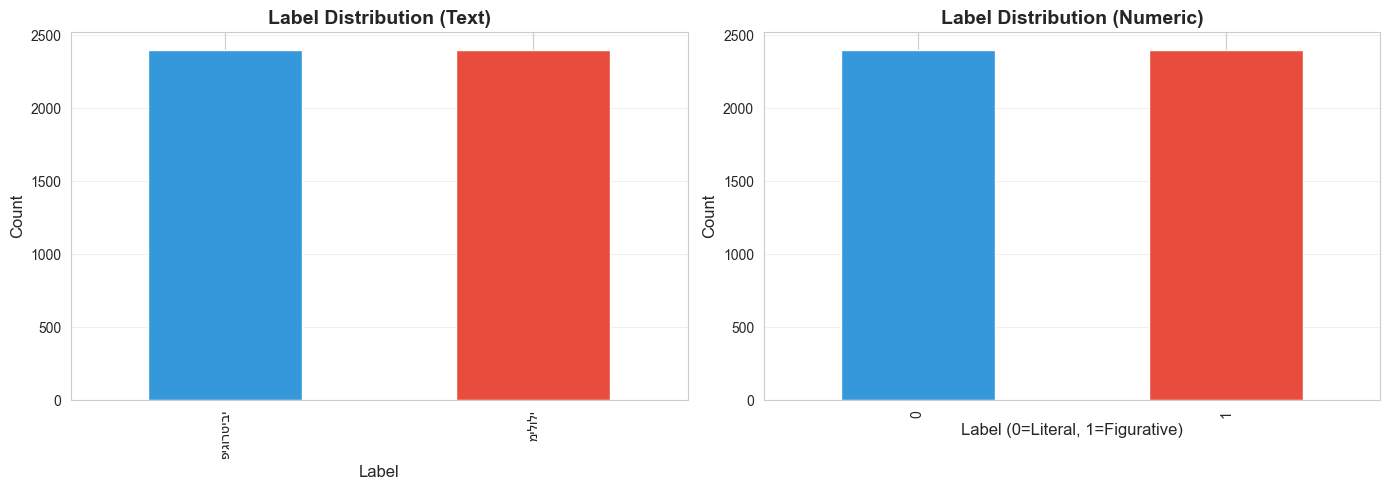

In [31]:
# Visualize label distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Label (text) distribution
df['label'].value_counts().plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Label Distribution (Text)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Label_2 (numeric) distribution
df['label_2'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color=['#3498db', '#e74c3c'])
axes[1].set_title('Label Distribution (Numeric)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Label (0=Literal, 1=Figurative)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Dataset Statistics (Mission 2.4)

In [32]:
# Basic statistics
print("Dataset Statistics:")
print(f"Total sentences: {len(df)}")
print(f"Unique idioms: {df['expression'].nunique()}")
print(f"\nSentence length (tokens):")
print(f"  Mean: {df['num_tokens'].mean():.2f}")
print(f"  Median: {df['num_tokens'].median():.0f}")
print(f"  Min: {df['num_tokens'].min()}")
print(f"  Max: {df['num_tokens'].max()}")

# Calculate idiom length
df['idiom_length'] = df['token_span_end'] - df['token_span_start']
print(f"\nIdiom length (tokens):")
print(f"  Mean: {df['idiom_length'].mean():.2f}")
print(f"  Median: {df['idiom_length'].median():.0f}")
print(f"  Min: {df['idiom_length'].min()}")
print(f"  Max: {df['idiom_length'].max()}")

Dataset Statistics:
Total sentences: 4800
Unique idioms: 60

Sentence length (tokens):
  Mean: 14.93
  Median: 10
  Min: 5
  Max: 37

Idiom length (tokens):
  Mean: 2.39
  Median: 2
  Min: 0
  Max: 5


In [33]:
# Top 10 idioms
print("Top 10 Most Frequent Idioms:")
top_idioms = df['expression'].value_counts().head(10)
for i, (idiom, count) in enumerate(top_idioms.items(), 1):
    print(f"{i:2d}. {idiom:40s} : {count:3d} occurrences")

Top 10 Most Frequent Idioms:
 1. שבר את הראש                              :  80 occurrences
 2. שיחק באש                                 :  80 occurrences
 3. איבד את הראש                             :  80 occurrences
 4. לב זהב                                   :  80 occurrences
 5. חותך כמו סכין                            :  80 occurrences
 6. הייתה בעננים                             :  80 occurrences
 7. חטף חום                                  :  80 occurrences
 8. שפכה אור                                 :  80 occurrences
 9. שבר שתיקה                                :  80 occurrences
10. רץ אחרי הזנב של עצמו                     :  80 occurrences


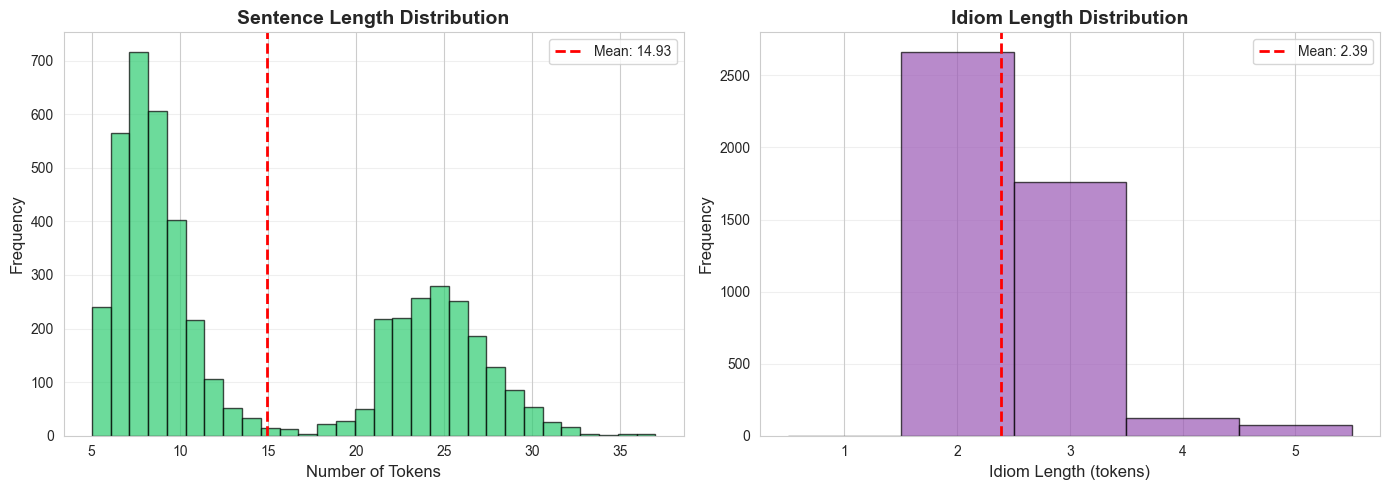

In [34]:
# Visualize sentence and idiom length distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sentence length distribution
axes[0].hist(df['num_tokens'], bins=30, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].axvline(df['num_tokens'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["num_tokens"].mean():.2f}')
axes[0].set_xlabel('Number of Tokens', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Sentence Length Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Idiom length distribution
axes[1].hist(df['idiom_length'], bins=range(1, int(df['idiom_length'].max()) + 2), color='#9b59b6', alpha=0.7, edgecolor='black', align='left')
axes[1].axvline(df['idiom_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["idiom_length"].mean():.2f}')
axes[1].set_xlabel('Idiom Length (tokens)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Idiom Length Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. IOB2 Tags Validation (Mission 2.3)

In [35]:
# Sample IOB2 tags analysis
print("Sample IOB2 Tags (first 5 rows):")
for idx in range(5):
    row = df.iloc[idx]
    tokens = row['text'].split()
    tags = row['iob2_tags'].split()
    
    print(f"\nRow {idx}:")
    print(f"Text: {row['text'][:80]}...")
    print(f"Label: {row['label']}")
    print(f"Expression: {row['expression']}")
    print(f"Tokens ({len(tokens)}): {tokens}")
    print(f"Tags ({len(tags)}): {tags}")
    print(f"Match: {len(tokens) == len(tags)} ✅" if len(tokens) == len(tags) else f"Match: {len(tokens) == len(tags)} ❌")

Sample IOB2 Tags (first 5 rows):

Row 0:
Text: אם שר האוצר לא ימצא פתרון למשבר החמור שנוצר בעקבות המלחמה הארוכה ביותר עד כה, הו...
Label: פיגורטיבי
Expression: שבר את הראש
Tokens (28): ['אם', 'שר', 'האוצר', 'לא', 'ימצא', 'פתרון', 'למשבר', 'החמור', 'שנוצר', 'בעקבות', 'המלחמה', 'הארוכה', 'ביותר', 'עד', 'כה,', 'הוא', 'עדיין', 'ימשיך', 'לשבור', 'את', 'הראש', 'בניסיון', 'להבין', 'איך', 'לתקן', 'את', 'הבעיה', 'התקציבית.']
Tags (28): ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-IDIOM', 'I-IDIOM', 'I-IDIOM', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Match: True ✅

Row 1:
Text: כמה זמן שברת את הראש על ניסוח המייל עם הרעיון המהפכני הזה שלך לדירקטוריון, והאם ...
Label: פיגורטיבי
Expression: שבר את הראש
Tokens (20): ['כמה', 'זמן', 'שברת', 'את', 'הראש', 'על', 'ניסוח', 'המייל', 'עם', 'הרעיון', 'המהפכני', 'הזה', 'שלך', 'לדירקטוריון,', 'והאם', 'בסוף', 'שלחת', 'אותו', 'כפי', 'שהוא?']
Tags (20): ['O', 'O', 'B-IDIOM', 'I-IDIOM', 'I-IDIOM', 'O', 'O', 'O', 'O', 'O'

In [36]:
# Check IOB2 tag validity (skip NaN values)
valid_tags = {'O', 'B-IDIOM', 'I-IDIOM'}
all_tags = set()

# Filter out NaN values before processing
valid_iob2 = df[df['iob2_tags'].notna()]['iob2_tags']

for tags_str in valid_iob2:
    tags = str(tags_str).split()
    all_tags.update(tags)

print(f"Total rows with IOB2 tags: {len(valid_iob2)} / {len(df)}")
print(f"Rows with missing IOB2 tags: {df['iob2_tags'].isna().sum()}")
print("\nAll unique IOB2 tags found:")
print(all_tags)
print(f"\nValid tags: {valid_tags}")
print(f"Invalid tags: {all_tags - valid_tags if all_tags - valid_tags else 'None'}")

if all_tags == valid_tags:
    print("\n✅ All tags are valid!")
else:
    print("\n⚠️ Invalid tags detected!")

Total rows with IOB2 tags: 4623 / 4800
Rows with missing IOB2 tags: 177

All unique IOB2 tags found:
{'I-IDIOM', 'B-IDIOM', 'O'}

Valid tags: {'I-IDIOM', 'B-IDIOM', 'O'}
Invalid tags: None

✅ All tags are valid!


## 9. Sentence Type Analysis (Mission 2.4)

In [37]:
# Classify sentence types
def classify_sentence_type(text):
    text = str(text).strip()
    if '?' in text:
        return 'Question'
    elif '!' in text:
        return 'Exclamatory'
    else:
        return 'Declarative'

df['sentence_type'] = df['text'].apply(classify_sentence_type)

print("Sentence Type Distribution:")
type_counts = df['sentence_type'].value_counts()
print(type_counts)
print(f"\nPercentages:")
print(df['sentence_type'].value_counts(normalize=True) * 100)

Sentence Type Distribution:
sentence_type
Declarative    4427
Question        342
Exclamatory      31
Name: count, dtype: int64

Percentages:
sentence_type
Declarative    92.229167
Question        7.125000
Exclamatory     0.645833
Name: proportion, dtype: float64


In [38]:
# Cross-tabulation: sentence type by label
print("Sentence Type by Label:")
crosstab = pd.crosstab(df['sentence_type'], df['label'], margins=True)
display(crosstab)

Sentence Type by Label:


label,מילולי,פיגורטיבי,All
sentence_type,,,
Declarative,2226,2201,4427
Exclamatory,20,11,31
Question,154,188,342
All,2400,2400,4800


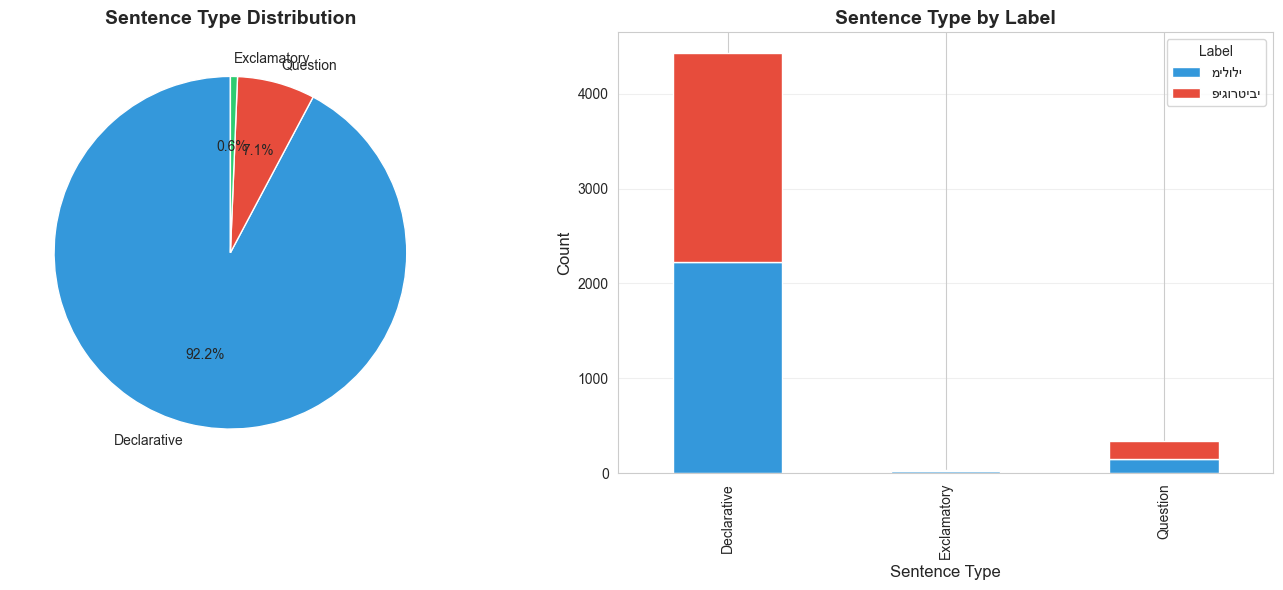

In [39]:
# Visualize sentence type distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
type_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', colors=['#3498db', '#e74c3c', '#2ecc71'], startangle=90)
axes[0].set_ylabel('')
axes[0].set_title('Sentence Type Distribution', fontsize=14, fontweight='bold')

# Stacked bar chart by label
pd.crosstab(df['sentence_type'], df['label']).plot(kind='bar', stacked=True, ax=axes[1], color=['#3498db', '#e74c3c'])
axes[1].set_xlabel('Sentence Type', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Sentence Type by Label', fontsize=14, fontweight='bold')
axes[1].legend(title='Label')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Explore Specific Examples

In [40]:
# Show examples of literal vs figurative for same idiom
sample_idiom = "שבר את הראש"  # "broke the head"

print(f"Examples for idiom: '{sample_idiom}'")
print("=" * 80)

idiom_samples = df[df['expression'] == sample_idiom]
literal_examples = idiom_samples[idiom_samples['label'] == 'מילולי'].head(3)
figurative_examples = idiom_samples[idiom_samples['label'] == 'פיגורטיבי'].head(3)

print("\nLITERAL Examples:")
for idx, row in literal_examples.iterrows():
    print(f"\n{row['text']}")

print("\n" + "=" * 80)
print("FIGURATIVE Examples:")
for idx, row in figurative_examples.iterrows():
    print(f"\n{row['text']}")

Examples for idiom: 'שבר את הראש'

LITERAL Examples:

הילד שבר את הראש כשהתגלגל מהמיטה החדשה בסלון, ונלקח לבדיקה בבית החולים הקרוב שם גילו רק חבלה קלה.

היא שברה את הראש כשנתקלה באבן גדולה בשביל הגינה

האם שמעת שהשחקן שבר את הראש באמצע ההצגה לאחר שנפל מהבמה, והקהל ההמום לא הבין אם זו הייתה תאונה או חלק מהעלילה?

FIGURATIVE Examples:

אם שר האוצר לא ימצא פתרון למשבר החמור שנוצר בעקבות המלחמה הארוכה ביותר עד כה, הוא עדיין ימשיך לשבור את הראש בניסיון להבין איך לתקן את הבעיה התקציבית.

כמה זמן שברת את הראש על ניסוח המייל עם הרעיון המהפכני הזה שלך לדירקטוריון, והאם בסוף שלחת אותו כפי שהוא?

היא מעולם לא שברה את הראש כל כך הרבה זמן כדי למצוא רעיון יצירתי למתנת יום הולדת מפתיעה כזאת, ובסוף, אחרי ימים של חיפושים, החליטה להזמין חופשה רומנטית באיטליה כהפתעה מושלמת.


## 11. Questions for Further Analysis

In [41]:
# Show all questions in the dataset
questions = df[df['sentence_type'] == 'Question']
print(f"Total questions: {len(questions)}")
print(f"\nFirst 5 questions:")
for idx, row in questions.head(5).iterrows():
    print(f"\n{row['text']}")
    print(f"  Expression: {row['expression']}")
    print(f"  Label: {row['label']}")

Total questions: 342

First 5 questions:

כמה זמן שברת את הראש על ניסוח המייל עם הרעיון המהפכני הזה שלך לדירקטוריון, והאם בסוף שלחת אותו כפי שהוא?
  Expression: שבר את הראש
  Label: פיגורטיבי

האם גם אתה שברת את הראש על השאלה הזאת במבחן גמר?
  Expression: שבר את הראש
  Label: פיגורטיבי

האם המהנדסים שברו את הראש מספיק לפני שהציגו את הפתרון?
  Expression: שבר את הראש
  Label: פיגורטיבי

האם שמעת שהשחקן שבר את הראש באמצע ההצגה לאחר שנפל מהבמה, והקהל ההמום לא הבין אם זו הייתה תאונה או חלק מהעלילה?
  Expression: שבר את הראש
  Label: מילולי

האם הילד שבר את הראש או רק נחבל קלות?
  Expression: שבר את הראש
  Label: מילולי


## 12. Summary and Validation Checklist

In [42]:
print("="*80)
print("MISSION 2.1 VALIDATION CHECKLIST")
print("="*80)

checklist = [
    ("Dataset loads successfully", len(df) > 0),
    ("4,800 total sentences", len(df) == 4800),
    ("All required columns present", set(expected_columns).issubset(set(df.columns))),
    ("No critical missing data", df[['text', 'expression', 'label', 'label_2']].isnull().sum().sum() == 0),
    ("Perfect label balance (50/50)", abs(df['label_2'].value_counts()[0] - df['label_2'].value_counts()[1]) == 0),
    ("60 unique idioms", df['expression'].nunique() == 60),
    ("No duplicate rows", df.duplicated().sum() == 0),
]

all_passed = True
for criterion, passed in checklist:
    status = "✅" if passed else "❌"
    print(f"{status} {criterion}")
    if not passed:
        all_passed = False

if all_passed:
    print("\n" + "="*80)
    print("🎉 ALL VALIDATION CRITERIA PASSED!")
    print("="*80)
    print("✅ Dataset is ready for Mission 2.5: Dataset Splitting")
else:
    print("\n⚠️ Some criteria not met. Please review.")

MISSION 2.1 VALIDATION CHECKLIST
✅ Dataset loads successfully
✅ 4,800 total sentences
✅ All required columns present
✅ No critical missing data
✅ Perfect label balance (50/50)
✅ 60 unique idioms
✅ No duplicate rows

🎉 ALL VALIDATION CRITERIA PASSED!
✅ Dataset is ready for Mission 2.5: Dataset Splitting


---
## End of Notebook

**Next Steps:**
- Mission 2.5: Dataset Splitting (Expression-Based Strategy)
- Mission 2.6: Data Preparation Testing